<a href="https://colab.research.google.com/github/marjph/Stat-226/blob/master/Pokemon_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np             
import pandas as pd             
import seaborn as sns             
import matplotlib.pyplot as plt   
import scipy.stats

%matplotlib inline

In [0]:
data = pd.read_csv("Pokemondb.csv")

In [16]:
data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [17]:
!pip install pandas_profiling

In [0]:
import pandas_profiling as pp

In [12]:
report = pp.ProfileReport(data)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [19]:
report

Number of variables,13
Number of observations,800
Total Missing (%),3.7%
Total size in memory,75.9 KiB
Average record size in memory,97.2 B
Numeric,8
Categorical,2
Boolean,1
Date,0
Text (Unique),1
Rejected,1


In [20]:
data.shape

(800, 13)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [24]:
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [25]:
data.Total.describe()

count    800.00000
mean     435.10250
std      119.96304
min      180.00000
25%      330.00000
50%      450.00000
75%      515.00000
max      780.00000
Name: Total, dtype: float64

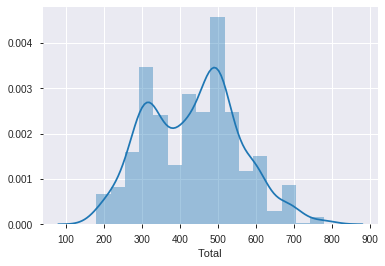

In [26]:
sns.distplot(data.Total)
plt.show()

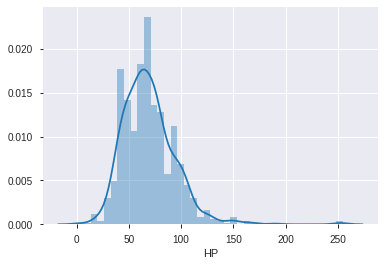

In [27]:
sns.distplot(data.HP)
plt.show()

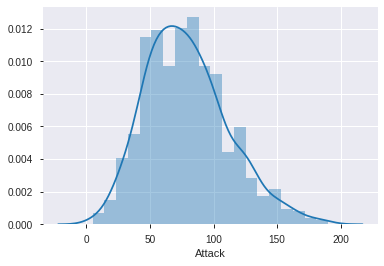

In [28]:
sns.distplot(data.Attack)
plt.show()

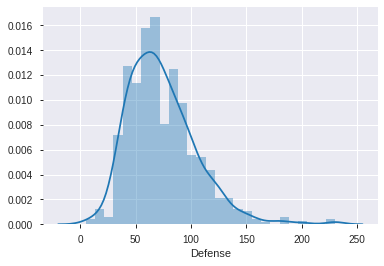

In [29]:
sns.distplot(data.Defense)
plt.show()

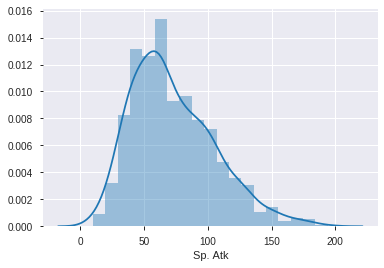

In [30]:
sns.distplot(data['Sp. Atk'])
plt.show()

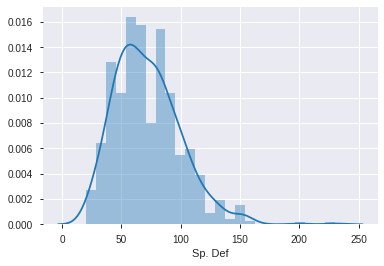

In [31]:
sns.distplot(data['Sp. Def'])
plt.show()

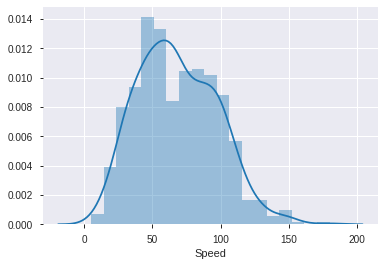

In [32]:
sns.distplot(data['Speed'])
plt.show()

In [33]:
data[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].describe()    

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


In [0]:
for pkm_type in data['Type 1'].unique():
    data[pkm_type] = data[['Type 1', 'Type 2']].apply(lambda x: 1 if pkm_type in x.values else 0, axis = 1)

In [0]:
def pokemon_stats(stats):
    
    summary_stats = []
    for i, pkm_type in enumerate(data['Type 1'].unique()):
        temp = data.loc[data[pkm_type]==1,stats].describe()
        temp.name = pkm_type
        summary_stats.append(temp)

    total_stats_summary = pd.concat(summary_stats, axis=1)
    
    print('Top types by average:')
    print(total_stats_summary.loc['mean'].sort_values(ascending=False).head(3))
    print(total_stats_summary.loc['50%'].sort_values(ascending=False).head(3))
        
    print('\nBottom types by average:')
    print(total_stats_summary.loc['mean'].sort_values(ascending=False).tail(3))
    print(total_stats_summary.loc['50%'].sort_values(ascending=False).tail(3))
    
    print('\nBiggest variance:')
    print(total_stats_summary.loc['std'].sort_values(ascending=False).head(3))
    
    plt_type=total_stats_summary.loc['mean'].sort_values(ascending=False).head(3).index.tolist()+total_stats_summary.loc['mean'].sort_values(ascending=False).tail(3).index.tolist()
    
    for i, pkm_type in enumerate(plt_type):
        sns.distplot(data.loc[data[pkm_type]==1,stats], label=pkm_type, hist=False)

Top types by average:
Dragon     541.760000
Steel      486.591837
Psychic    477.088889
Name: mean, dtype: float64
Dragon    600.0
Fire      496.5
Steel     495.0
Name: 50%, dtype: float64

Bottom types by average:
Normal    402.068627
Poison    397.693548
Bug       379.527778
Name: mean, dtype: float64
Normal    415.0
Poison    395.0
Bug       392.5
Name: 50%, dtype: float64

Biggest variance:
Dragon     143.146929
Fairy      135.741532
Psychic    133.760363
Name: std, dtype: float64


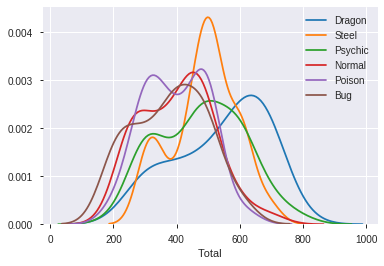

In [41]:
pokemon_stats('Total')

Top types by average:
Dragon    82.900000
Ice       78.631579
Normal    76.735294
Name: mean, dtype: float64
Dragon      80.0
Fighting    75.0
Ground      75.0
Name: 50%, dtype: float64

Bottom types by average:
Ghost     62.826087
Poison    62.596774
Bug       56.736111
Name: mean, dtype: float64
Electric    60.0
Bug         60.0
Ghost       59.0
Name: 50%, dtype: float64

Biggest variance:
Normal    35.733870
Ghost     29.196883
Water     27.100248
Name: std, dtype: float64


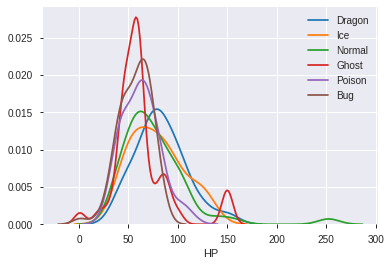

In [42]:
pokemon_stats('HP')

Top types by average:
Dragon      105.760000
Fighting    104.660377
Dark         96.784314
Name: mean, dtype: float64
Fighting    104.0
Dragon      100.0
Dark         90.0
Name: 50%, dtype: float64

Bottom types by average:
Poison      70.790323
Electric    69.520000
Fairy       61.575000
Name: mean, dtype: float64
Bug         65.0
Electric    65.0
Fairy       55.0
Name: 50%, dtype: float64

Biggest variance:
Psychic    37.924026
Bug        36.998094
Rock       34.857501
Name: std, dtype: float64


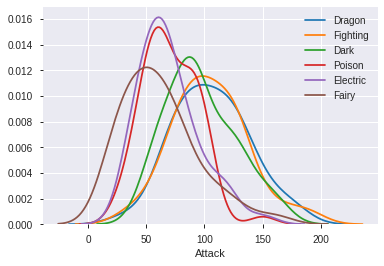

In [43]:
pokemon_stats('Attack')

Top types by average:
Steel     116.612245
Rock      107.086207
Ground     87.701493
Name: mean, dtype: float64
Steel     106.0
Rock      104.0
Dragon     90.0
Name: 50%, dtype: float64

Bottom types by average:
Electric    66.540000
Poison      63.741935
Normal      59.607843
Name: mean, dtype: float64
Electric    61.5
Normal      60.0
Bug         60.0
Name: 50%, dtype: float64

Biggest variance:
Steel     39.200243
Rock      38.373641
Ground    37.909388
Name: std, dtype: float64


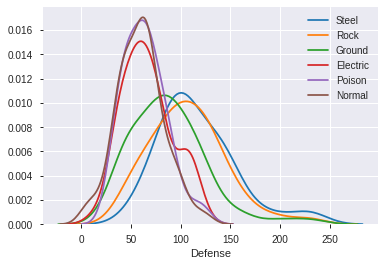

In [44]:
pokemon_stats('Defense')

Top types by average:
Dragon     97.44
Psychic    94.60
Fire       93.00
Name: mean, dtype: float64
Dragon     98.5
Psychic    95.0
Fire       92.5
Name: 50%, dtype: float64

Bottom types by average:
Rock      60.396552
Normal    57.078431
Bug       53.569444
Name: mean, dtype: float64
Rock      55.0
Normal    52.5
Bug       50.0
Name: 50%, dtype: float64

Biggest variance:
Dragon     41.088834
Psychic    37.687598
Fairy      34.323499
Name: std, dtype: float64


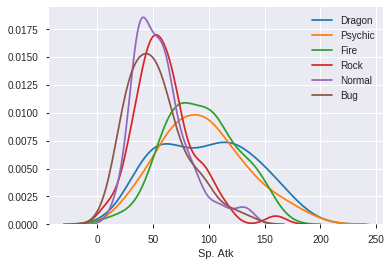

In [45]:
pokemon_stats('Sp. Atk')

Top types by average:
Dragon     86.900000
Psychic    86.766667
Steel      83.163265
Name: mean, dtype: float64
Dragon     90.0
Steel      85.0
Psychic    85.0
Name: 50%, dtype: float64

Bottom types by average:
Ground    64.835821
Bug       64.666667
Normal    63.745098
Name: mean, dtype: float64
Dark      65.0
Normal    60.5
Bug       60.0
Name: 50%, dtype: float64

Biggest variance:
Rock     36.741132
Fairy    35.147446
Bug      31.562145
Name: std, dtype: float64


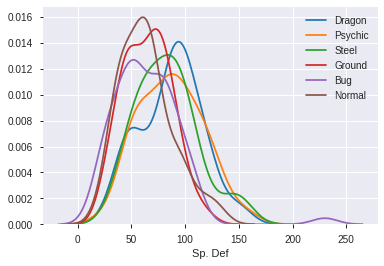

In [46]:
pokemon_stats('Sp. Def')

Top types by average:
Flying      86.386139
Electric    82.940000
Dragon      82.140000
Name: mean, dtype: float64
Dragon      90.0
Electric    86.0
Flying      85.0
Name: 50%, dtype: float64

Bottom types by average:
Steel    57.102041
Fairy    55.850000
Rock     51.103448
Name: mean, dtype: float64
Steel    50.0
Fairy    50.0
Rock     47.0
Name: 50%, dtype: float64

Biggest variance:
Psychic    35.340604
Bug        32.618938
Normal     28.286524
Name: std, dtype: float64


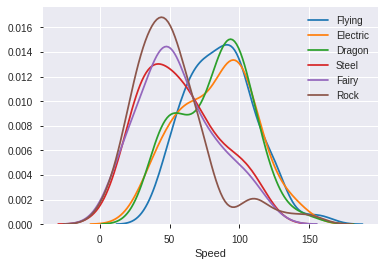

In [47]:
pokemon_stats('Speed')

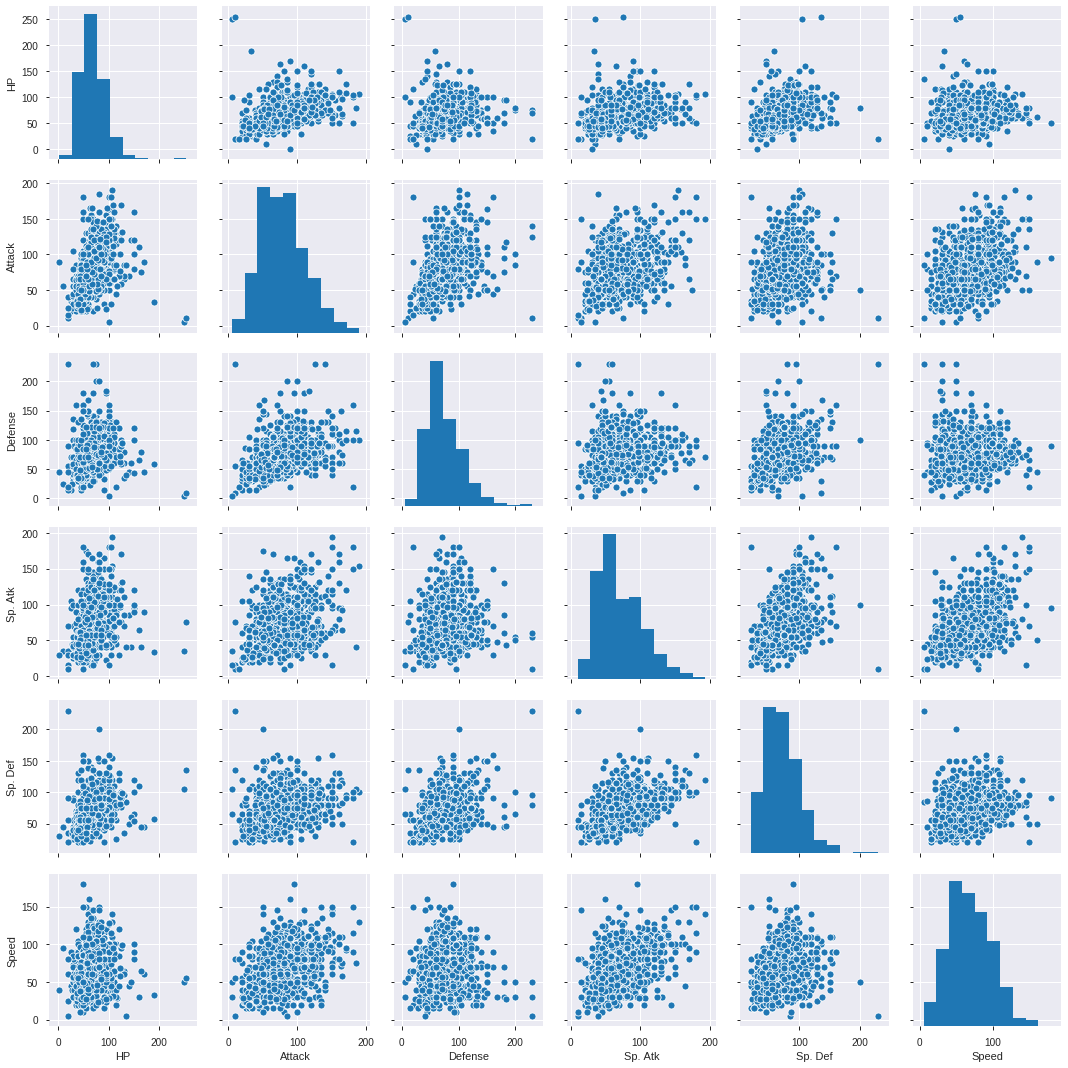

In [48]:
sns.pairplot(data[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']])
plt.show()

In [0]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(max_iter=1000, random_state=42)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

features = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']

In [0]:
X = data[features].values

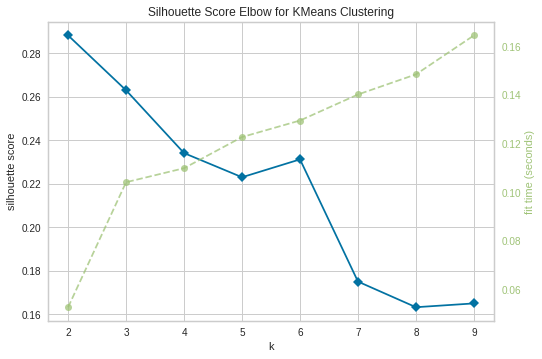

In [51]:
visualizer.fit(X)    
visualizer.poof()

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()
X1 = scaler.fit_transform(X)

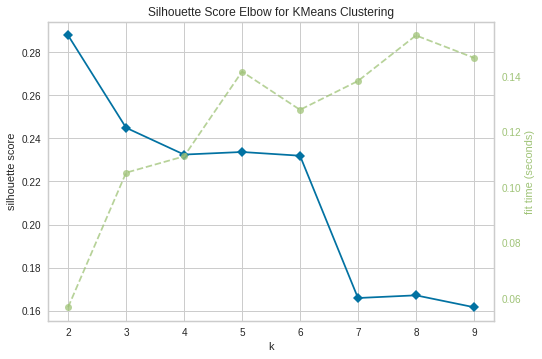

In [54]:
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')
visualizer.fit(X1)   
visualizer.poof() 

In [0]:
model_kmeans = KMeans(n_clusters=3, max_iter=1000, random_state=42)

In [0]:
data['kmeans_group'] = model_kmeans.fit_predict(X)

In [57]:
cluster_center = pd.DataFrame(model_kmeans.cluster_centers_)
cluster_center.columns = features
cluster_center['total'] = cluster_center.sum(axis=1)

cluster_center['ordered_label'] = cluster_center.total.rank().astype(int)
cluster_center.sort_values(by='ordered_label').set_index('ordered_label')

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,total
ordered_label,,,,,,,
1,54.824513,57.181058,53.470752,52.445682,53.019499,54.094708,325.036212
2,78.220859,95.490798,111.822086,67.251534,87.582822,55.674847,496.042945
3,82.643885,97.510791,77.881295,102.395683,87.093525,93.982014,541.507194


In [0]:
relabel = cluster_center.ordered_label.to_dict()
data.kmeans_group = data.kmeans_group.map(lambda x: relabel[x])

In [59]:
data.kmeans_group.value_counts()

1    359
3    278
2    163
Name: kmeans_group, dtype: int64

In [61]:
data.loc[data.kmeans_group==1].sample(10, random_state=42)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Grass,Fire,Water,Bug,Normal,Poison,Electric,Ground,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon,Dark,Steel,Flying,kmeans_group
457,412,Burmy,Bug,NaN,224,40,29,45,29,45,36,4,False,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
69,64,Kadabra,Psychic,NaN,400,40,35,30,120,70,105,1,False,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
620,559,Scraggy,Dark,Fighting,348,50,75,70,35,70,48,5,False,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
653,592,Frillish,Water,Ghost,335,55,40,50,65,85,40,5,False,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
97,90,Shellder,Water,NaN,305,30,65,100,45,25,40,1,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
592,532,Timburr,Fighting,NaN,305,75,80,55,25,35,35,5,False,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
25,20,Raticate,Normal,NaN,413,55,81,60,50,70,97,1,False,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
99,92,Gastly,Ghost,Poison,310,30,35,30,100,35,80,1,False,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
508,458,Mantyke,Water,Flying,345,45,20,50,60,120,50,4,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
246,228,Houndour,Dark,Fire,330,45,60,30,80,50,65,2,False,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [62]:
data.loc[data.kmeans_group==2].sample(10, random_state=42)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Grass,Fire,Water,Bug,Normal,Poison,Electric,Ground,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon,Dark,Steel,Flying,kmeans_group
675,614,Beartic,Ice,NaN,485,95,110,80,70,80,50,5,False,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2
584,525,Boldore,Rock,NaN,390,70,105,105,50,40,20,5,False,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2
655,594,Alomomola,Water,NaN,470,165,75,80,40,45,65,5,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
283,260,SwampertMega Swampert,Water,Ground,635,100,150,110,95,110,70,3,False,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
460,413,WormadamTrash Cloak,Bug,Steel,424,60,69,95,69,95,36,4,False,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2
197,182,Bellossom,Grass,NaN,490,75,80,95,90,100,50,2,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
784,711,GourgeistAverage Size,Ghost,Grass,494,65,90,122,58,75,84,6,False,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2
264,245,Suicune,Water,NaN,580,100,75,115,90,115,85,2,True,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
502,452,Drapion,Poison,Dark,500,70,90,110,60,75,95,4,False,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,2
743,675,Pangoro,Fighting,Dark,495,95,124,78,69,71,58,6,False,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,2


In [63]:
data.loc[data.kmeans_group==3].sample(10, random_state=42)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Grass,Fire,Water,Bug,Normal,Poison,Electric,Ground,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon,Dark,Steel,Flying,kmeans_group
101,94,Gengar,Ghost,Poison,500,60,65,60,130,75,110,1,False,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,3
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
582,523,Zebstrika,Electric,NaN,497,75,100,63,80,63,116,5,False,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3
468,421,Cherrim,Grass,NaN,450,70,60,70,87,78,85,4,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
726,658,Greninja,Water,Dark,530,72,95,67,103,71,122,6,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3
703,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3
338,310,Manectric,Electric,NaN,475,70,75,60,105,60,105,3,False,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3
610,550,Basculin,Water,NaN,460,70,92,65,80,55,98,5,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
763,693,Clawitzer,Water,NaN,500,71,73,88,120,89,59,6,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
473,426,Drifblim,Ghost,Flying,498,150,80,44,90,54,80,4,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,3


In [0]:
from sklearn.cluster import KMeans 
km = KMeans (n_clusters = 6, random_state = 1)

In [68]:
feat = data._get_numeric_data () 
feat = feat.drop ('#', axis = 1) 
feat.head ()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Grass,Fire,Water,Bug,Normal,Poison,Electric,Ground,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon,Dark,Steel,Flying,kmeans_group
0,318,45,49,49,65,65,45,1,False,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,405,60,62,63,80,80,60,1,False,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,525,80,82,83,100,100,80,1,False,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3
3,625,80,100,123,122,120,80,1,False,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3
4,309,39,52,43,60,50,65,1,False,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [69]:
feat ['Legendary'] = feat ['Legendary']. astype (int) 
feat.head ()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Grass,Fire,Water,Bug,Normal,Poison,Electric,Ground,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon,Dark,Steel,Flying,kmeans_group
0,318,45,49,49,65,65,45,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,405,60,62,63,80,80,60,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,525,80,82,83,100,100,80,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3
3,625,80,100,123,122,120,80,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3
4,309,39,52,43,60,50,65,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [70]:
feat ['HP'] = feat ['HP'] * 1000 
feat.head ()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Grass,Fire,Water,Bug,Normal,Poison,Electric,Ground,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon,Dark,Steel,Flying,kmeans_group
0,318,45000,49,49,65,65,45,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,405,60000,62,63,80,80,60,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,525,80000,82,83,100,100,80,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3
3,625,80000,100,123,122,120,80,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3
4,309,39000,52,43,60,50,65,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
km.fit (feat) 
cluster = km.predict (feat)

In [72]:
output = feat.copy () 
output ['cluster'] = cluster 
output.head ()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Grass,Fire,Water,Bug,Normal,Poison,Electric,Ground,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon,Dark,Steel,Flying,kmeans_group,cluster
0,318,45000,49,49,65,65,45,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,405,60000,62,63,80,80,60,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,3
2,525,80000,82,83,100,100,80,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,0
3,625,80000,100,123,122,120,80,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,0
4,309,39000,52,43,60,50,65,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [73]:
output.groupby (by = 'cluster'). mean ()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Grass,Fire,Water,Bug,Normal,Poison,Electric,Ground,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon,Dark,Steel,Flying,kmeans_group
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,487.056522,75639.130435,90.734783,81.265217,83.256522,78.882609,77.278261,3.586957,0.078261,0.121739,0.095652,0.139130,0.095652,0.117391,0.078261,0.056522,0.069565,0.043478,0.078261,0.130435,0.095652,0.021739,0.039130,0.073913,0.065217,0.078261,0.147826,2.360870
1,295.711268,38436.619718,49.697183,53.126761,48.690141,51.880282,53.880282,2.971831,0.000000,0.126761,0.063380,0.161972,0.147887,0.105634,0.112676,0.070423,0.049296,0.049296,0.035211,0.098592,0.063380,0.077465,0.021127,0.035211,0.042254,0.049296,0.112676,1.056338
2,563.083333,135916.666667,101.541667,77.541667,92.041667,84.125000,71.916667,3.791667,0.333333,0.041667,0.000000,0.250000,0.000000,0.208333,0.000000,0.041667,0.000000,0.083333,0.083333,0.041667,0.041667,0.125000,0.208333,0.208333,0.041667,0.000000,0.083333,2.541667
3,399.898496,57458.646617,71.860902,70.721805,66.251880,67.289474,66.315789,3.289474,0.022556,0.131579,0.078947,0.135338,0.109023,0.127820,0.086466,0.075188,0.067669,0.048872,0.052632,0.097744,0.071429,0.090226,0.041353,0.030075,0.067669,0.071429,0.109023,1.609023
4,465.000000,231666.666667,16.000000,24.333333,47.666667,99.333333,46.000000,1.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.666667
5,539.155556,98600.000000,101.296296,89.577778,90.503704,87.377778,71.800000,3.266667,0.244444,0.096296,0.088889,0.214815,0.000000,0.140741,0.037037,0.044444,0.192593,0.059259,0.103704,0.133333,0.051852,0.022222,0.074074,0.111111,0.081481,0.037037,0.148148,2.459259


In [77]:
feat_scale = (feat - feat.mean ()) / feat.std () 
feat_scale.head ()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Grass,Fire,Water,Bug,Normal,Poison,Electric,Ground,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon,Dark,Steel,Flying,kmeans_group
0,-0.976155,-0.950032,-0.924328,-0.796655,-0.238981,-0.248033,-0.801002,-1.398762,-0.297195,2.722458,-0.294700,-0.432099,-0.314289,-0.382033,3.447948,-0.258037,-0.302144,-0.229272,-0.266199,-0.355812,-0.279409,-0.246843,-0.223174,-0.258037,-0.260779,-0.255274,-0.379884,-1.013110
1,-0.250931,-0.362595,-0.523803,-0.347700,0.219422,0.290974,-0.284837,-1.398762,-0.297195,2.722458,-0.294700,-0.432099,-0.314289,-0.382033,3.447948,-0.258037,-0.302144,-0.229272,-0.266199,-0.355812,-0.279409,-0.246843,-0.223174,-0.258037,-0.260779,-0.255274,-0.379884,-1.013110
2,0.749377,0.420654,0.092390,0.293665,0.830626,1.009651,0.403383,-1.398762,-0.297195,2.722458,-0.294700,-0.432099,-0.314289,-0.382033,3.447948,-0.258037,-0.302144,-0.229272,-0.266199,-0.355812,-0.279409,-0.246843,-0.223174,-0.258037,-0.260779,-0.255274,-0.379884,1.241376
3,1.582967,0.420654,0.646964,1.576395,1.502951,1.728328,0.403383,-1.398762,-0.297195,2.722458,-0.294700,-0.432099,-0.314289,-0.382033,3.447948,-0.258037,-0.302144,-0.229272,-0.266199,-0.355812,-0.279409,-0.246843,-0.223174,-0.258037,-0.260779,-0.255274,-0.379884,1.241376
4,-1.051178,-1.185007,-0.831899,-0.989065,-0.391782,-0.787041,-0.112782,-1.398762,-0.297195,-0.366856,3.389045,-0.432099,-0.314289,-0.382033,-0.289665,-0.258037,-0.302144,-0.229272,-0.266199,-0.355812,-0.279409,-0.246843,-0.223174,-0.258037,-0.260779,-0.255274,-0.379884,-1.013110


In [0]:
km = KMeans (n_clusters = 6, random_state = 1) 
km.fit (feat_scale) 
cluster2 = km.predict (feat_scale)

In [79]:
output2 = feat_scale.copy () 
output2 ['cluster'] = cluster2 
output2.head ()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Grass,Fire,Water,Bug,Normal,Poison,Electric,Ground,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon,Dark,Steel,Flying,kmeans_group,cluster
0,-0.976155,-0.950032,-0.924328,-0.796655,-0.238981,-0.248033,-0.801002,-1.398762,-0.297195,2.722458,-0.294700,-0.432099,-0.314289,-0.382033,3.447948,-0.258037,-0.302144,-0.229272,-0.266199,-0.355812,-0.279409,-0.246843,-0.223174,-0.258037,-0.260779,-0.255274,-0.379884,-1.013110,1
1,-0.250931,-0.362595,-0.523803,-0.347700,0.219422,0.290974,-0.284837,-1.398762,-0.297195,2.722458,-0.294700,-0.432099,-0.314289,-0.382033,3.447948,-0.258037,-0.302144,-0.229272,-0.266199,-0.355812,-0.279409,-0.246843,-0.223174,-0.258037,-0.260779,-0.255274,-0.379884,-1.013110,1
2,0.749377,0.420654,0.092390,0.293665,0.830626,1.009651,0.403383,-1.398762,-0.297195,2.722458,-0.294700,-0.432099,-0.314289,-0.382033,3.447948,-0.258037,-0.302144,-0.229272,-0.266199,-0.355812,-0.279409,-0.246843,-0.223174,-0.258037,-0.260779,-0.255274,-0.379884,1.241376,5
3,1.582967,0.420654,0.646964,1.576395,1.502951,1.728328,0.403383,-1.398762,-0.297195,2.722458,-0.294700,-0.432099,-0.314289,-0.382033,3.447948,-0.258037,-0.302144,-0.229272,-0.266199,-0.355812,-0.279409,-0.246843,-0.223174,-0.258037,-0.260779,-0.255274,-0.379884,1.241376,5
4,-1.051178,-1.185007,-0.831899,-0.989065,-0.391782,-0.787041,-0.112782,-1.398762,-0.297195,-0.366856,3.389045,-0.432099,-0.314289,-0.382033,-0.289665,-0.258037,-0.302144,-0.229272,-0.266199,-0.355812,-0.279409,-0.246843,-0.223174,-0.258037,-0.260779,-0.255274,-0.379884,-1.013110,1


In [0]:
from sklearn.decomposition import PCA 

In [0]:
pca = PCA (n_components = 3, random_state = 1) 
pca.fit (feat_scale) 
feat_pca = pca.transform (feat_scale)

In [82]:
output2 ['comp1'] = feat_pca [:, 0] 
output2 ['comp2'] = feat_pca [:, 1] 
output2 ['comp3'] = feat_pca [:, 2] 
output2.head ()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Grass,Fire,Water,Bug,Normal,Poison,Electric,Ground,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon,Dark,Steel,Flying,kmeans_group,cluster,comp1,comp2,comp3
0,-0.976155,-0.950032,-0.924328,-0.796655,-0.238981,-0.248033,-0.801002,-1.398762,-0.297195,2.722458,-0.294700,-0.432099,-0.314289,-0.382033,3.447948,-0.258037,-0.302144,-0.229272,-0.266199,-0.355812,-0.279409,-0.246843,-0.223174,-0.258037,-0.260779,-0.255274,-0.379884,-1.013110,1,-2.465765,-0.198921,-1.601004
1,-0.250931,-0.362595,-0.523803,-0.347700,0.219422,0.290974,-0.284837,-1.398762,-0.297195,2.722458,-0.294700,-0.432099,-0.314289,-0.382033,3.447948,-0.258037,-0.302144,-0.229272,-0.266199,-0.355812,-0.279409,-0.246843,-0.223174,-0.258037,-0.260779,-0.255274,-0.379884,-1.013110,1,-1.272249,-0.142296,-1.512298
2,0.749377,0.420654,0.092390,0.293665,0.830626,1.009651,0.403383,-1.398762,-0.297195,2.722458,-0.294700,-0.432099,-0.314289,-0.382033,3.447948,-0.258037,-0.302144,-0.229272,-0.266199,-0.355812,-0.279409,-0.246843,-0.223174,-0.258037,-0.260779,-0.255274,-0.379884,1.241376,5,1.232818,-0.228185,-1.396531
3,1.582967,0.420654,0.646964,1.576395,1.502951,1.728328,0.403383,-1.398762,-0.297195,2.722458,-0.294700,-0.432099,-0.314289,-0.382033,3.447948,-0.258037,-0.302144,-0.229272,-0.266199,-0.355812,-0.279409,-0.246843,-0.223174,-0.258037,-0.260779,-0.255274,-0.379884,1.241376,5,2.568780,0.435010,-1.459364
4,-1.051178,-1.185007,-0.831899,-0.989065,-0.391782,-0.787041,-0.112782,-1.398762,-0.297195,-0.366856,3.389045,-0.432099,-0.314289,-0.382033,-0.289665,-0.258037,-0.302144,-0.229272,-0.266199,-0.355812,-0.279409,-0.246843,-0.223174,-0.258037,-0.260779,-0.255274,-0.379884,-1.013110,1,-2.112740,-0.988764,0.035306
